In [1]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
from IPython import display

In [2]:
load_dotenv()

# Load Gemini key
genai.configure(api_key=os.environ.get("GEMINI_API_KEY"))


# Setup safety_settings
safety_settings = [
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    },
]

# Genera config
generation_config = {
    "temperature": 0,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
}


gemini_exp = "gemini-exp-1114"

In [3]:
def gen_content(
    user_prompts,
    model_name,
    system_prompt=None,
    safety_settings=safety_settings,
    generation_config=generation_config,
    stream=False, 
) -> str:
    # Create the model
    model = genai.GenerativeModel(
        model_name=model_name,
        generation_config=generation_config,
        safety_settings = safety_settings,
        system_instruction=system_prompt,
    )
    responses = model.generate_content(
        user_prompts,
        stream=stream,
    )
    return responses

In [4]:
passage_prompt = """
Given a passage:

Corporate managers often work in groups because of the complexity of strategic prob-lems. A consensus-seeking group's effectiveness may be impaired, however, if the group
(5) values harmony over open evaluation of
ideas. Consequently, some theorists advocate
building decisional conflict into the group process. Doing so, they argue, should yield better decisions. While conflict potentially
(10) offers benefits, a group's effectiveness also depends on members' reactions to group experiences. Ideally, the group process wins the commitment of its members. The process, though, may generate so much divisiveness
(15) that implementation and future cooperation are undermined. Management groups thus face an apparent dilemma: decisional conflict may yield better decisions at the risk of weakening managerial effectiveness. Conversely,
(20) the harmony that facilitates cooperation and implementation may come at the cost of infe-
Efforts to build conflict into group decision making have focused on two approaches,
(25) dialectical inquiry and devil's advocacy. Both work by dividing the group into two competing subgroups, relying on formal debate to prevent uncritical acceptance of the seemingly obvious, and continuing until participants
(30) agree on a decision. The approaches differ in the roles played by the subgroups. In dialectical inquiry, the subgroups present opposed sets of assumptions and recommendations, and debate until they reach agreement. In
(35) devil's advocacy, the second subgroup critiques the assumptions and recommendations of the first, but offers no alternative. The first subgroup revises its ideas and presents them for a second critique. The process con-
(40) tinues until the subgroups agree.
The varying roles of the subgroups have led to disagreement among theorists over the effectiveness of the approaches. Mason and Mitroff claim that devil's advocacy does not
(45) identify suitable alternatives, whereas dialectical inquiry's juxtaposition of opposed sets of ideas does so. Cosier, however, argues that dialectical inquiry adds potentially confusing steps to the process that would require exten-
(50) sive training, and may run counter to managers' accustomed ways of thinking; he also feels that this approach may lead to excessive compromise.
"""

In [5]:
instruction_prompt = "Answer the question, choose a right option, and only base on the passage above:"
system_prompt = "You are a helpful assitant to reason and find out the right answer. Explain step-by-step."

In [6]:
q1 = """
The author's primary purpose in the passage is to
A. emphasize the benefits of group decision making and reconcile two differing approaches
B. describe the benefits and risks of decisional conflict and alternative means of its use
C. defend an innovative method of group management against its critics
D. argue that group decision making is superior to any other decision-making approach
E. advocate one method of group decision making over another
"""

q2 = """
It can be inferred from the passage that advocates of both the dialectical inquiry and devil's advocacy processes would agree with which of the following statements?
A. Superior decisions often reflect compromises made between opposing views.
B. Superior decisions stem from a consideration of opposing sets of proposals.
C. Managers should avoid changing their customary ways of thinking.
D. Formal debate can lead to a more thorough understanding of a problem.
E. Effective group management requires extensive training.
"""

q3 = """
Which one of the following, if true, would counter Cosier's criticism of dialectical inquiry?
A. Frequent compromises among managers may lead to ill-advised actions.
B. Demanding that managers agree often weakens implementation of decisions.
C. Encouraging conflict among managers improves the quality of decisions.
D. Some managerial decisions must be made and implemented rapidly to be effective.
E. Managers willing to alter their accustomed modes of thinking often make better decisions.
"""

q4 = """
Which of the following exemplifies the functioning of management groups, as those groups are described in the passage?
A. citizens group gathers to monitor the results of a closely contested election.
B. special prosecutor's office organizes to investigate alleged misconduct on the part of government officials.
C. committee of administrators forms to address the major problems of running a hospital.
D. panel of experts assembles to study an issue of growing public concern.
E. faculty committee forms to observe the search for a college president.
"""

q5 = """
Manager: The success ratio for new businesses is lower than ever, with only 12 percent surviving the first two years. Furthermore, many businesses already operating are doing so at a loss, or with their lowest profit margin in decades. The blame must fall on the excessive demands of the workers. Profits drop in order to pay for new paint, radios, and artwork. We have lost sight of the fact that work is intended to be productive, not enjoyable.
Which of the following, if true, would most weaken the manager's argument?
A. Workers, whether they are performing productively or not, often have very difficult and highly taxing duties.
B. In most cases, improvements in the work environment increase productivity by increasing worker satisfaction.
C. The failure of many businesses in the past was due to exorbitant taxation rather than excessive demands of the workers.
D. The failure of a new business is not necessarily the same thing as the failure of an already existing business.
E. The failure of a new business is not necessarily the same thing as operating an already existing business without a profit.
"""

```
- Q1. B
- Q2. D
- Q3. E
- Q4. C
- Q5. B
```

### Q1

In [7]:
responses = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q1],
    model_name=gemini_exp,
    system_prompt=system_prompt,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

Let's break down the passage and analyze the author's purpose step-by-step:

**1. Identify the Main Topic:**

The passage primarily discusses **decisional conflict** within corporate management groups. It explores the idea that conflict can lead to better decisions but also poses risks to group harmony and effectiveness.

**2. Analyze the Structure:**

* **Lines 1-22:** Introduce the concept of decisional conflict, its potential benefits (better decisions), and its risks (weakened managerial effectiveness). It presents a dilemma faced by management groups.
* **Lines 23-40:** Describe two approaches to building conflict into group decision-making: dialectical inquiry and devil's advocacy. It explains how each approach works.
* **Lines 41-52:** Discuss the disagreement among theorists regarding the effectiveness of these two approaches, highlighting the arguments of Mason and Mitroff versus Cosier.

**3. Determine the Author's Purpose:**

The author doesn't advocate for one approach over

### Q2

In [8]:
responses = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q2],
    model_name=gemini_exp,
    system_prompt=system_prompt,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

Let's break down the question and analyze the passage to find the correct answer.

**Understanding the Question**

The question asks us to identify a statement that advocates of *both* dialectical inquiry and devil's advocacy would agree with. This means we need to find a common ground between these two approaches as described in the passage.

**Analyzing the Passage**

1. **Lines 23-30:** The passage introduces dialectical inquiry and devil's advocacy as two approaches to build conflict into group decision-making. It states that *both* approaches work by:
   - Dividing the group into two competing subgroups.
   - Relying on formal debate to prevent uncritical acceptance.
   - Continuing until participants agree on a decision.

2. **Lines 31-40:** The passage then explains the differences between the two approaches, focusing on the roles of the subgroups. However, the core commonality remains the use of debate and competing viewpoints to arrive at a better decision.

**Evaluating the O

### Q3

In [9]:
responses = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q3],
    model_name=gemini_exp,
    system_prompt=system_prompt,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

Let's break down the question and analyze the passage to find the correct answer.

**Understanding the Question**

The question asks us to find a statement that would counter Cosier's criticism of dialectical inquiry. To do this, we first need to understand what Cosier's criticism is.

**Cosier's Criticism**

According to the passage, Cosier criticizes dialectical inquiry on the following grounds:

1. **Adds confusing steps:** It introduces potentially confusing steps to the decision-making process.
2. **Requires extensive training:** These confusing steps would require extensive training for managers.
3. **Runs counter to managers' accustomed ways of thinking:** It goes against how managers are used to thinking.
4. **May lead to excessive compromise:** It might result in too much compromise.

**Analyzing the Options**

Now, let's examine each option to see if it counters Cosier's criticism:

*   **A. Frequent compromises among managers may lead to ill-advised actions.** This option su

### Q4

In [10]:
responses = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q4],
    model_name=gemini_exp,
    system_prompt=system_prompt,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

Let's break down the passage and analyze each answer choice to find the best fit.

**Understanding the Passage**

The passage discusses how corporate managers work in groups to tackle complex strategic problems. It highlights the tension between seeking consensus (harmony) and fostering decisional conflict to arrive at better decisions. The passage introduces two methods for building conflict: dialectical inquiry and devil's advocacy.

**Analyzing Answer Choices**

* **A. citizens group gathers to monitor the results of a closely contested election.** 
    * This scenario involves observation and monitoring, not decision-making or problem-solving related to complex strategic issues. It doesn't fit the context of corporate management groups described in the passage.

* **B. special prosecutor's office organizes to investigate alleged misconduct on the part of government officials.**
    * While this involves a group working on a complex issue, the focus is on investigation and legal pro

### Q5

In [11]:
responses = gen_content(
    user_prompts=[passage_prompt, instruction_prompt, q5],
    model_name=gemini_exp,
    system_prompt=system_prompt,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

Let's break down the manager's argument and then analyze how each option affects it.

**Manager's Argument:**

* **Premise 1:** New businesses have a low success rate (only 12% survive two years).
* **Premise 2:** Existing businesses are operating at a loss or with low profit margins.
* **Conclusion:** This is due to excessive demands of workers for things like paint, radios, and artwork, which make work enjoyable rather than productive.

**Analyzing the Options:**

* **A. Workers, whether they are performing productively or not, often have very difficult and highly taxing duties.** 
    * This statement acknowledges the difficulty of workers' duties but doesn't directly address the manager's claim that demands for non-productive items are causing business failures. It doesn't weaken the argument.

* **B. In most cases, improvements in the work environment increase productivity by increasing worker satisfaction.**
    * This directly challenges the manager's core assumption that making

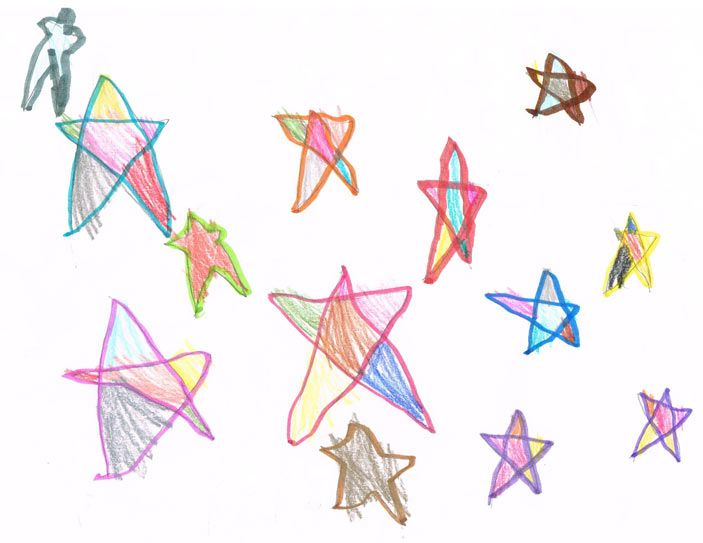

In [12]:
stars = display.Image("Stars.jpeg")
display.display(stars)

In [13]:
responses = gen_content(
    user_prompts=["Count all stars in the picture below:",
                  stars],
    model_name=gemini_exp,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

There are **10 stars** in the picture.


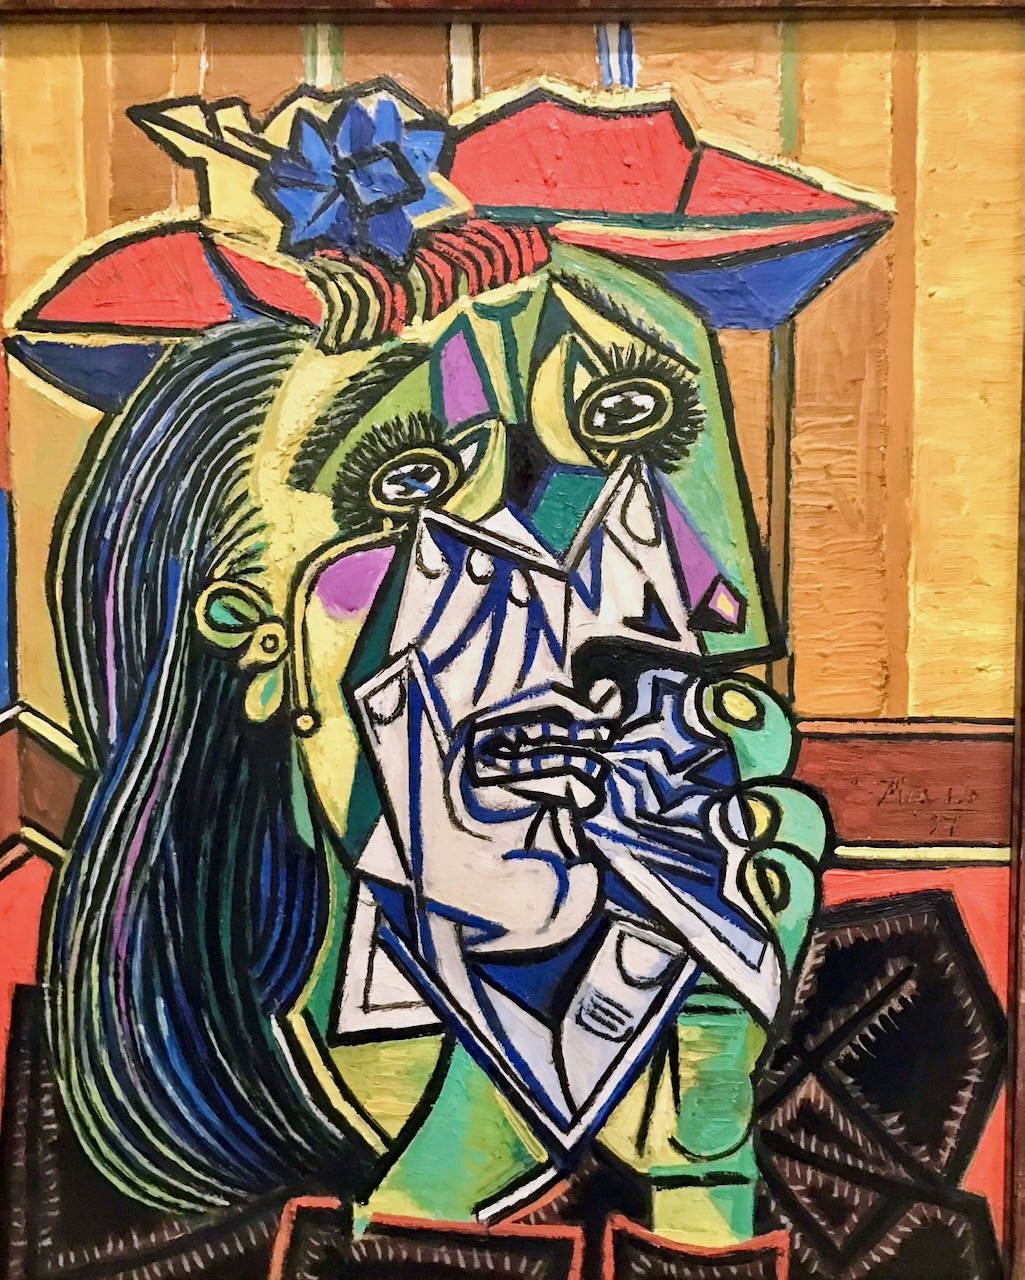

In [14]:
artwork = display.Image("IMG_0289.jpeg")
display.display(artwork)

In [15]:
responses = gen_content(
    user_prompts=["Whose is this artwork and its name?",
                  artwork],
    model_name=gemini_exp,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

The artwork is **"Weeping Woman"** by **Pablo Picasso**. It was painted in 1937.


In [17]:
responses = gen_content(
    user_prompts=["Create a 'flappy bird like' game in Python code."],
    system_prompt="You are a helpful Python developer.",
    model_name=gemini_exp,
    stream=True,
)

for response in responses:
    print(response.candidates[0].content.parts[0].text, end="")

Alright, let's build a simplified Flappy Bird-like game in Python using the `pygame` library. You'll need to have `pygame` installed. If you don't, you can install it using pip:

```bash
pip install pygame
```

Here's the code for the game:

```python
import pygame
import random

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 400, 600
FPS = 60
GRAVITY = 0.25
JUMP_STRENGTH = -5
PIPE_GAP = 150
PIPE_SPEED = 2

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)

# Create the game window
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Flappy Bird")
clock = pygame.time.Clock()

# Bird properties
bird_rect = pygame.Rect(100, HEIGHT // 2 - 25, 40, 30)
bird_velocity = 0

# Pipe properties
pipe_list = []
pipe_spawn_timer = 0
pipe_spawn_interval = 120  # Adjust for difficulty

# Score
score = 0
font = pygame.font.Font(None, 36)

def create_pipe():
    pipe_height = random.randint(100, 400)
    bottom_pipe = pygame.Rect(WIDTH, pipe_